In [1]:
%load_ext autoreload
%autoreload 2

#%pip install keras-tuner


from pathlib import Path
import os
import sys
sys.path.insert(0, "..")
sys.path

import numpy as np
import seaborn as sns
sns.set_theme()

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from src.data import make_dataset


from src.visualization import visualize_simple





In [2]:
datadir_processed = Path("../data/processed")

In [3]:
data = []
labels = []

for f in sorted(os.listdir(datadir_processed)):
    folder = os.path.join(datadir_processed, f)
    if os.path.isdir(folder):
        #print(f"{f} is a target class")
        for i in sorted(os.listdir(folder)):
            image=tf.keras.preprocessing.image.load_img(folder+'/'+i, 
            target_size= (64,64))
            image=np.array(image)
            data.append(image)
            labels.append(f)

data = np.array(data)
#labels = np.array(labels)
labels = list(labels)
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels)



X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)



# Pre-processing
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255




In [4]:
INPUT_SHAPE = (64, 64, 3)
NUM_CLASSES = 10

model = keras.Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',
input_shape=(64,64,3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        9280      
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 128)       0         
                                                                 
 flatten (Flatten)           (None, 107648)            0         
                                                        

In [5]:
#
model.compile(
loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy'])


model.fit(X_train, y_train, epochs=2, 
validation_data=(X_test, y_test))

Epoch 1/2
444/444 [==============================] - 119s 268ms/step - loss: 1.8282 - accuracy: 0.3323 - val_loss: 1.4654 - val_accuracy: 0.4572
Epoch 2/2
444/444 [==============================] - 119s 268ms/step - loss: 1.4267 - accuracy: 0.4844 - val_loss: 1.2519 - val_accuracy: 0.5434


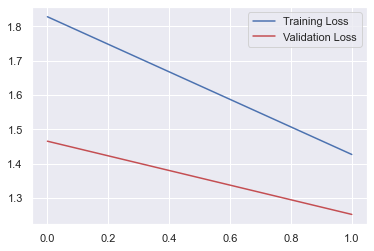

In [6]:
plt.plot(model.history.history['loss'],color='b',
label='Training Loss')
plt.plot(model.history.history['val_loss'],color='r',
label='Validation Loss')
plt.legend()
plt.show()

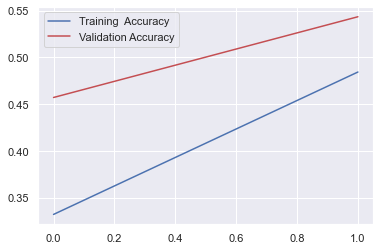

In [7]:
plt.plot(model.history.history['accuracy'],color='b',
label='Training  Accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',
label='Validation Accuracy')
plt.legend()
plt.show()

In [8]:



y_test = np.argmax(y_test,axis=1)
predict = model.predict(X_test).argmax(axis=1)



In [9]:
#encoder = LabelEncoder()
#y_test = encoder.fit_transform(y_test)
#predict = encoder.fit_transform(predict)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.43      0.48      0.46       393
           1       0.67      0.03      0.06        68
           2       0.50      0.01      0.02       218
           3       0.73      0.76      0.74       378
           4       0.76      0.79      0.78       279
           5       0.62      0.43      0.50       380
           6       0.57      0.90      0.70       563
           7       0.60      0.41      0.49       399
           8       0.38      0.57      0.46       516
           9       0.47      0.27      0.34       354

    accuracy                           0.54      3548
   macro avg       0.57      0.47      0.45      3548
weighted avg       0.55      0.54      0.51      3548



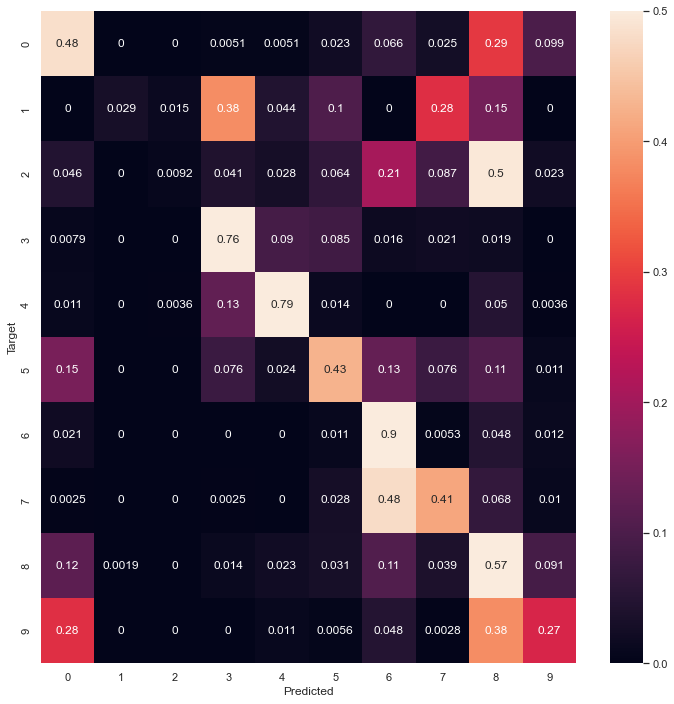

In [10]:
cfm = confusion_matrix(y_test, predict)
visualize_simple.cfm_heatmap(cfm, figsize=(12,12), scale='rowwise', vmax= 0.5)